In [1]:
# http://dl.lateralis.org/public/sagebook/sagebook-web-20130530.pdf
%display latex

15.1.1  Jeu de poker et probabilités
Nous commençons par résoudre un problème classique : dénombrer certaines
combinaisons de cartes dans un jeu de poker, pour en déduire leur probabilité.
Une carte de poker est caractérisée par une couleur (cœur, carreau, pique ou trèfle) et une valeur (2, 3, . . ., 9, 10, valet, dame, roi, ou as). Le jeu de poker est constitué de toutes les cartes possibles ; il s’agit donc du produit cartésien de l’ensemble des couleurs et de l’ensemble des valeurs :

In [2]:
Symboles = Set(["Coeur", "Carreau", "Pique", "Trefle"])
Valeurs = Set([2..10] + ["Valet", "Dame", "Roi", "As"])
Cartes = cartesian_product([Valeurs, Symboles])

Il y a 4 couleurs et 13 valeurs possibles donc 4 × 13 = 52
cartes dans le jeu de poker :

In [3]:
Symboles.cardinality(),Valeurs.cardinality(),Cartes.cardinality()

(4, 13, 52)

In [4]:
Cartes.random_element()

(5, 'Trefle')

In [5]:
Set([Cartes.random_element(), Cartes.random_element()])

{(4, 'Carreau'), ('Dame', 'Coeur')}

In [6]:
C, z = var('C, z'); sys = [ C == z + C*C ]

In [7]:
sol = solve(sys, C, solution_dict=True); sol

[{C: -1/2*sqrt(-4*z + 1) + 1/2}, {C: 1/2*sqrt(-4*z + 1) + 1/2}]

In [8]:
s0 = sol[0][C]; s1 = sol[1][C]

In [9]:
s0.series(z, 6)

1*z + 1*z^2 + 2*z^3 + 5*z^4 + 14*z^5 + Order(z^6)

In [10]:
s1.series(z, 6)

1 + (-1)*z + (-1)*z^2 + (-2)*z^3 + (-5)*z^4 + (-14)*z^5 + Order(z^6)

In [11]:
C = s0

In [12]:
C.series(z, 11)

1*z + 1*z^2 + 2*z^3 + 5*z^4 + 14*z^5 + 42*z^6 + 132*z^7 + 429*z^8 + 1430*z^9 + 4862*z^10 + Order(z^11)

In [13]:
C.series(z, 101).coefficient(z,100)

227508830794229349661819540395688853956041682601541047340

In [14]:
L.<z> = LazyPowerSeriesRing(QQ)

In [15]:
C = L();C._name ='C';C.define( z + C * C )

In [16]:
[C.coefficient(i) for i in range(11)]

[0, 1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

In [17]:
C.coefficient(100)

227508830794229349661819540395688853956041682601541047340

In [18]:
z = var('z'); C = s0; C

-1/2*sqrt(-4*z + 1) + 1/2

In [19]:
derivative(C, z, 1)

1/sqrt(-4*z + 1)

In [20]:
derivative(C, z, 2)

2/(-4*z + 1)^(3/2)

In [21]:
derivative(C, z, 3)

12/(-4*z + 1)^(5/2)

In [22]:
def d(n): return derivative(C, n).subs(z=0)

In [23]:
[ (d(n+1) / d(n)) for n in range(1,17) ]

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62]

C est n-1 ième nombre de Catalan

In [24]:
def c(n): return 1/n*binomial(2*(n-1),n-1)

In [25]:
[c(k) for k in range(1, 11)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

In [26]:
[catalan_number(k-1) for k in range(1, 11)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

In [27]:
%time cc = c(100000)

CPU times: user 387 ms, sys: 0 ns, total: 387 ms
Wall time: 387 ms


In [28]:
ZZ(cc).ndigits()

60198

In [29]:
C = SetPartitions([1,2,3]); C


Set partitions of {1, 2, 3}

In [30]:
C.cardinality()

5

In [31]:
C.list()

[{{1, 2, 3}}, {{1}, {2, 3}}, {{1, 3}, {2}}, {{1, 2}, {3}}, {{1}, {2}, {3}}]

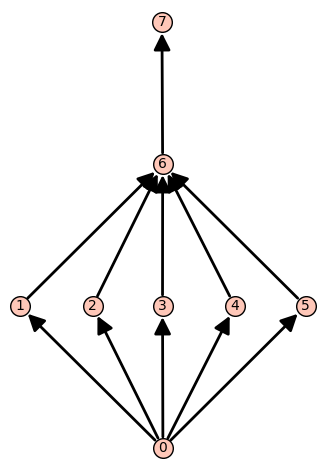

In [32]:
C = Posets(8); C
C.unrank(20).plot()

In [33]:
len(list(graphs(5)))

34

In [34]:
#show(graphs(5, lambda G: G.size() <= 4))
# page 355 Construire un graphe sommets et arêtes

In [35]:
g = Graph();g.order(), g.size()

(0, 0)

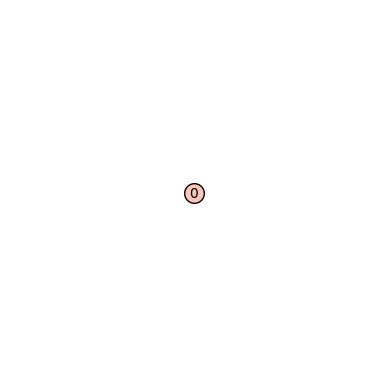

In [36]:
g.add_vertex(0);g.show()

In [37]:
g.order(), g.size()

(1, 0)

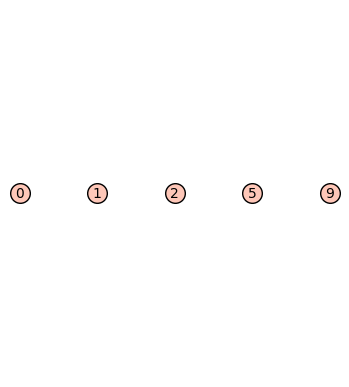

In [38]:
g.add_vertices([1, 2, 5, 9]);g.show()

In [39]:
g.order(), g.size()

(5, 0)

In [40]:
g.add_edges([(1,5), (9,2), (2,5), (1,9)])

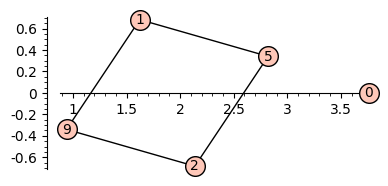

(5, 4, None)

In [41]:
g.order(), g.size(),g.show(axes=True)

In [42]:
g.characteristic_polynomial()

x^5 - 4*x^3

In [43]:
factor(g.characteristic_polynomial())

(x - 2) * (x + 2) * x^3

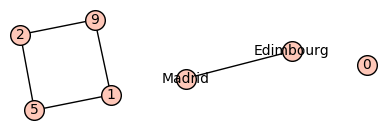

(None, None)

In [44]:
g.add_edge("Madrid", "Edimbourg"),g.show()

Ajouter l’arête(1,2)est équivalent à ajouter l’arête(2,1). On notera de
plus que les méthodes add_vertex et add_edge ont toutes les deux un « plu-
riel » (add_vertices et add_edges) qui prend une liste en argument et permet une écriture plus compacte (voir par exemple §16.4.1, où l’on construit un graphe après avoir généré l’ensemble de ses arêtes).
En général, Sage n’est pas regardant quant au type des objets qu’il est possible d’utiliser comme sommets d’un graphe. Il acceptera en fait tout objet Python immuable (et donc pas, au moment de la version 5.9 de Sage, des objets de la classe Graph eux-mêmes), c’est-à-dire tout ce qu’un dictionnaire pourrait accepter comme nom de clef (cf. §3.3.9). Il est bien entendu possible de supprimer ensuite les éléments ajoutés à l’aide des méthodes delete_* et d’énumérer les sommets ou les arêtes, sur lesquels nous itérerons souvent.

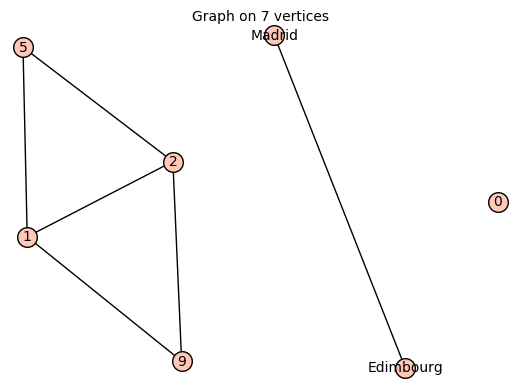

In [45]:
g = Graph({0 : [],1 : [5, 9],2 : [1, 5, 9],'Edimbourg': ['Madrid']});g

16.1.2  Les constructeurs disponibles En dépit des illustrations précédentes, il est assez rare de saisir une table d’adjacence sous Sage, ou même d’énumérer manuellement une par une ses arêtes pour créer un graphe. La plupart du temps, il est plus efficace de les définir à partir
des éléments de base déjà disponibles : les méthodes de graphs.* permettent de construire plus de soixante-dix graphes ou familles de graphes, que nous présentons maintenant. Les graphes de Chvátal et de Petersen, par exemple, sont obtenus sous Sage par les lignes suivantes :

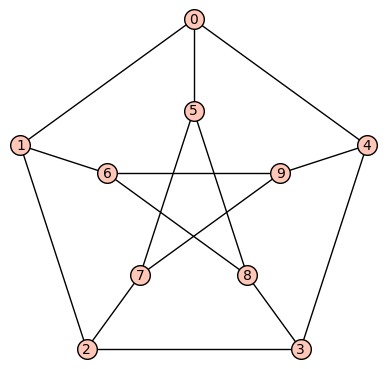

In [46]:
P = graphs.PetersenGraph();P.show()

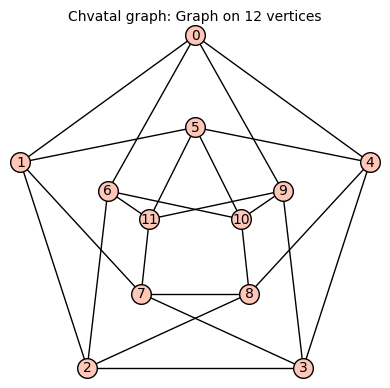

In [47]:
C = graphs.ChvatalGraph();C

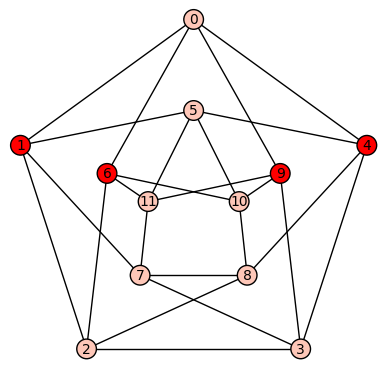

In [48]:
C.show(partition = [C.independent_set()])

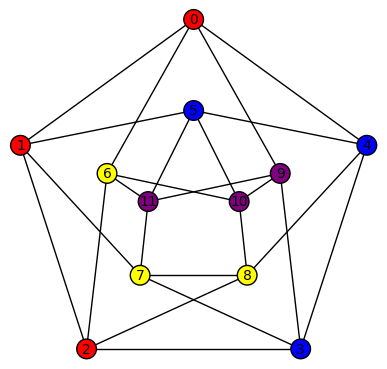

In [49]:
C.show(vertex_colors = {
    "red" : [0, 1, 2],   "blue" : [3, 4, 5],
    "yellow" : [6, 7, 8], "purple" : [9, 10, 11]})

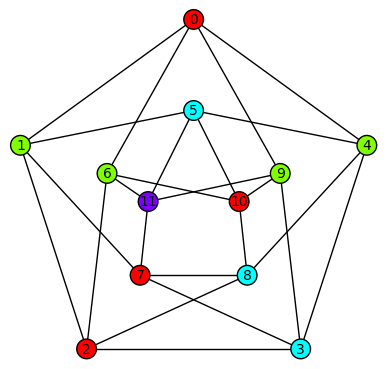

In [50]:
C.coloring(hex_colors = True)
{'#00ffff': [3, 8, 5],'#7f00ff': [11],\
 '#ff0000': [0, 2, 7, 10],'#7fff00': [1, 4, 6, 9]}
C.show(vertex_colors = C.coloring(hex_colors = True))

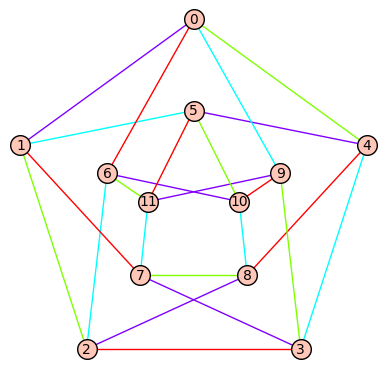

In [51]:
from sage.graphs.graph_coloring import edge_coloring
edge_coloring(C, hex_colors = True)
C.show(edge_colors = edge_coloring(C, hex_colors = True))

In [54]:
L = [graphs.CompleteGraph(i)
for i in range(3,3+10)]
for number, G in enumerate(L):
    G.plot().save("/home/pi/fano/pic/"+'graph'+ str(number) +'.png')

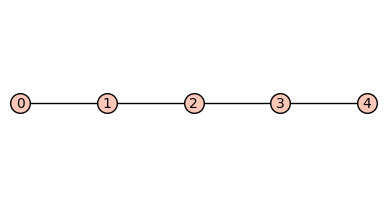

In [56]:
P5 = graphs.PathGraph(5); House = graphs.HouseGraph();P5.show()

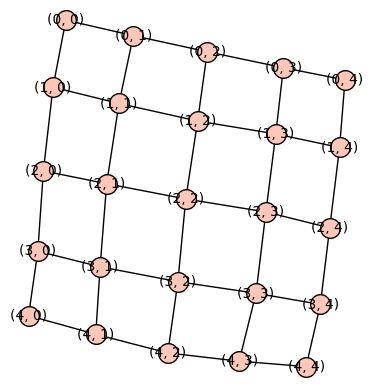

In [58]:
n = 5; Path = graphs.PathGraph(n);Grid = Path.cartesian_product(Path)
Grid.show()

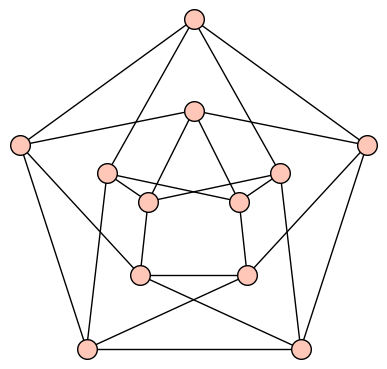

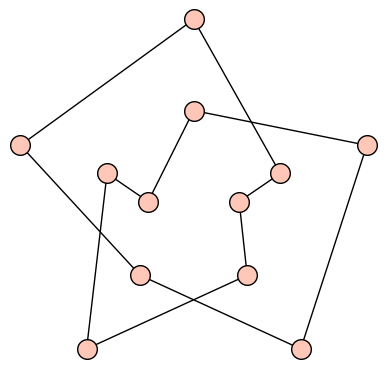

In [59]:
g = graphs.ChvatalGraph(); cycle = g.hamiltonian_cycle()
g.show(vertex_labels = False); cycle.show(vertex_labels = False)

In [93]:
p = MixedIntegerLinearProgram(maximization=False, solver = "GLPK")
x, y, z = p['x'], p['y'], p['z']
p.set_integer(x); p.set_integer(y)
p = MixedIntegerLinearProgram()

In [94]:
g = graphs.ChvatalGraph()
g = g.minimum_outdegree_orientation()
p = MixedIntegerLinearProgram()
f = p.new_variable()
s, t = 0, 2

In [95]:
for v in g:
    if v == s or v == t: continue
    p.add_constraint(
        p.sum(f[v,u] for u in g.neighbors_out(v)) ==
        p.sum(f[u,v] for u in g.neighbors_in(v)))

In [96]:
for e in g.edges(labels = False): p.add_constraint( f[e] <= 1 )
p.set_objective(p.sum( f[s,u] for u in g.neighbors_out(s)))    

In [97]:
p.solve()

2.0

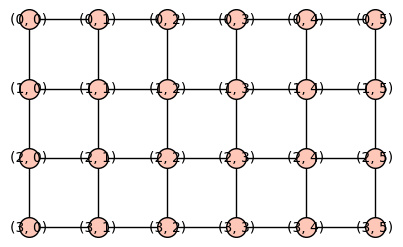

In [101]:
g = graphs.Grid2dGraph(4, 6)
p = MixedIntegerLinearProgram()
b = p.new_variable(binary = True);g.show()

In [103]:
B = lambda x,y : b[frozenset([x,y])]

In [104]:
for u in g:
    p.add_constraint( p.sum( B(u,v) for v in g.neighbors(u) ) == 2 )

In [109]:
p.solve();h = Graph()

In [110]:
h.add_edges( [(u,v) for u, v in g.edges(labels = False)
      if p.get_values(B(u,v)) == 1.0 ] )

In [111]:
while not h.is_connected():
    S = h.connected_components()[0]
    p.add_constraint(
        p.sum( B(u,v) for u,v
            in g.edge_boundary(S, labels = False))
            >= 2)
    zero = p.solve()
    h = Graph()
    h.add_edges( [(u,v) for u,v in
                g.edges(labels = False)
           if p.get_values(B(u,v)) == 1.0 ] )

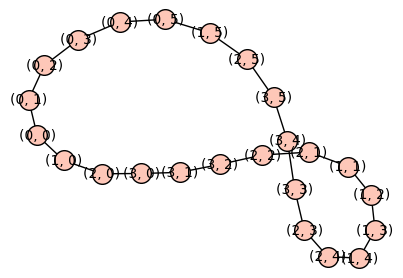

In [113]:
h.show()

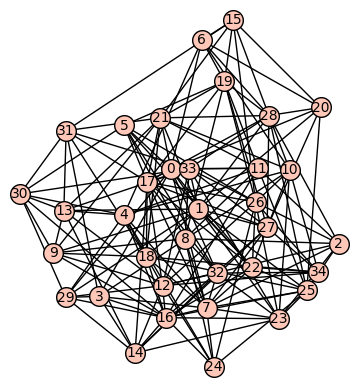

In [118]:
g = graphs.RandomGNP(35, 0.3);g.show()
#%time MTZ(g)

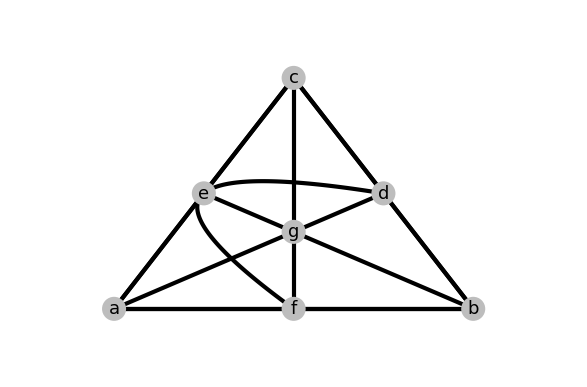

In [120]:
M = matroids.named_matroids.Fano()
M.show()

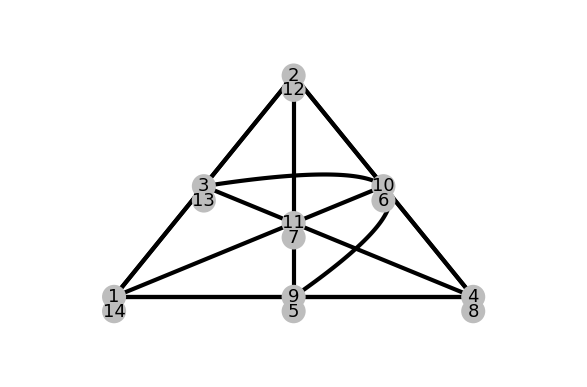

In [121]:
M = matroids.PG(3,2).contract(0)
M.show()

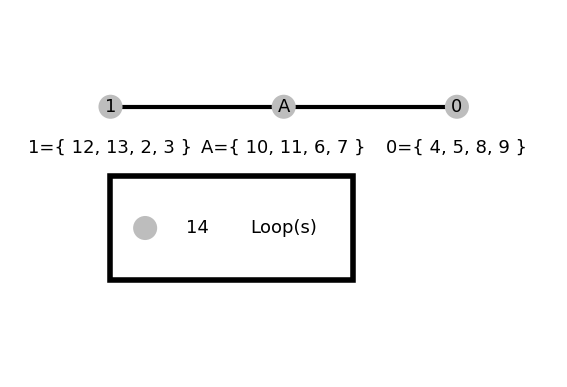

In [122]:
M = matroids.PG(3,2).contract([0,1])
M.show()

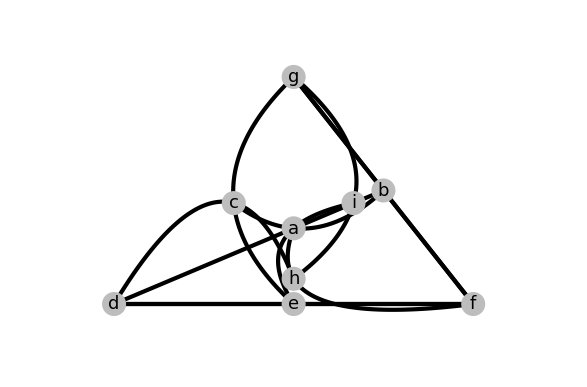

In [123]:
matroids.named_matroids.Pappus().show()

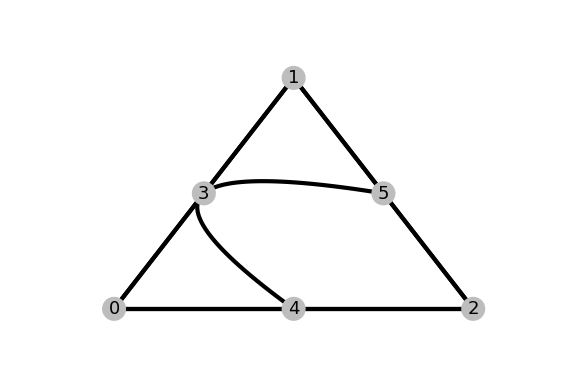

In [124]:
M = matroids.CompleteGraphic(4);M.show()

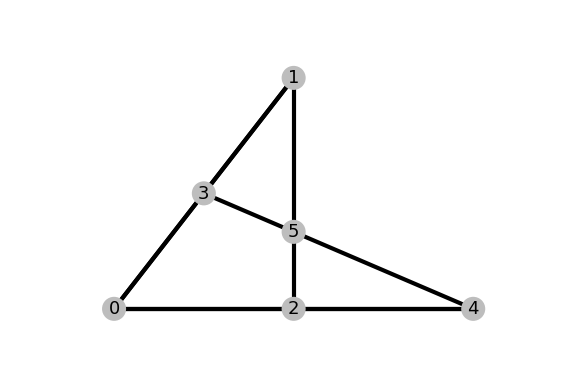

In [125]:
M = matroids.CompleteGraphic(4)
M.show(B=[0,1,4])

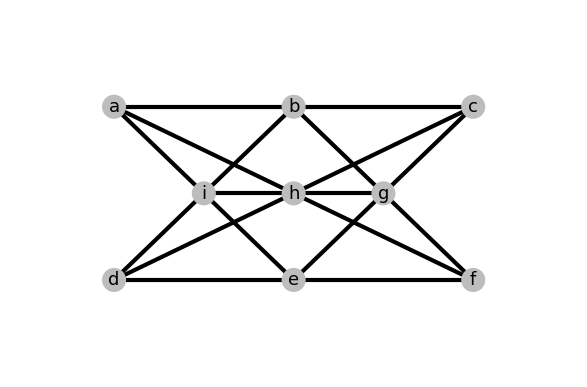

In [126]:
M = matroids.named_matroids.Pappus()
pos = {'a':(0,1), 'b': (1,1), 'c':(2,1), 'd':(0,0), 'e':(1,0), 'f':(2,0), 'g':(1.5,0.5), 'h':(1,0.5), 'i':(0.5,0.5)}
M.show(pos_method=1,pos_dict=pos)

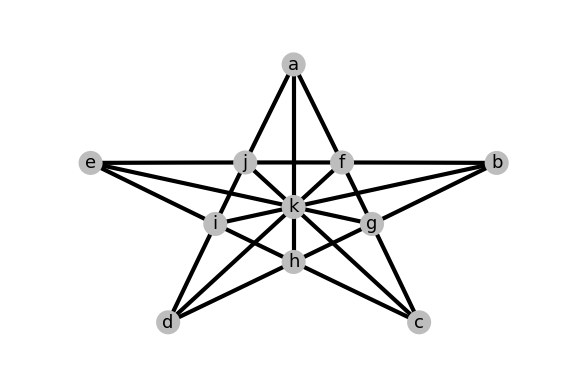

In [127]:
M=matroids.named_matroids.BetsyRoss()
pos={}
s="abcde"
t="fghij"
x=1.61
y=1/1.61
for i in range(5):
    pos[s[i]]=(RR(x*sin(2*pi*i/5)), RR(x*cos(2*pi*i/5)))
    pos[t[i]]=(RR(y*sin(2*pi*(i+1/2)/5)), RR(y*cos(2*pi*(i+1/2)/5)))
pos['k']=(0,0)
M.show(pos_method=1,pos_dict=pos)

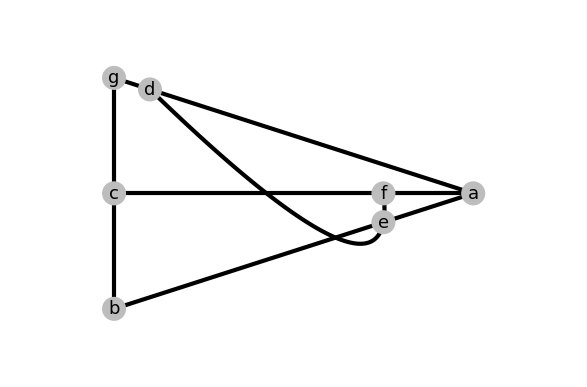

In [128]:
M = matroids.named_matroids.P7()
pos = {'a':(2,1), 'b':(0,0), 'c': (0,1), 'g': (0,2), 'e': (1.5,0.75), 'f':(1.5,1), 'd':(0.2,1.9)}
M.show(pos_method=1,pos_dict=pos)

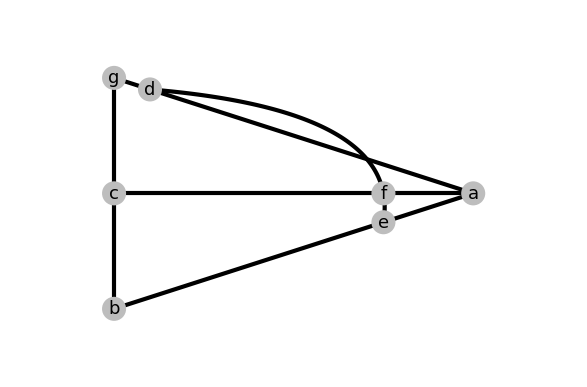

In [129]:
M = matroids.named_matroids.P7()
pos = {'a':(2,1), 'b':(0,0), 'c': (0,1), 'g': (0,2), 'e': (1.5,0.75), 'f':(1.5,1), 'd':(0.2,1.9)}
lines=[['d','f','e']]
M.show(pos_method=1,pos_dict=pos,lineorders=lines)

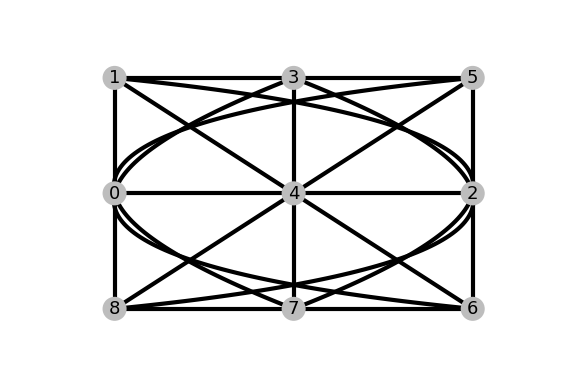

In [130]:
M = matroids.AG(2,3)
pos={1:(0,2), 3:(1,2), 5:(2,2), 0:(0,1), 4:(1,1), 2:(2,1), 8:(0,0), 7:(1,0), 6:(2,0)}
M.show(pos_method=1,pos_dict=pos)

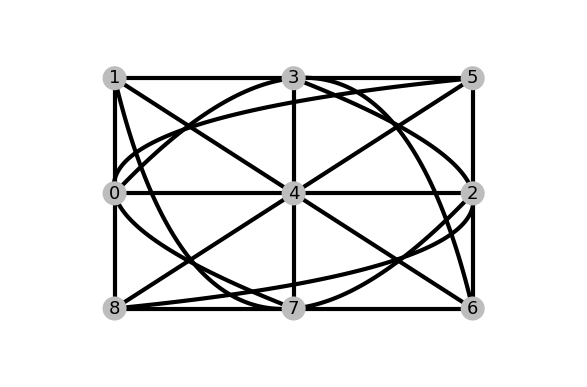

In [131]:
pos={1:(0,2), 3:(1,2), 5:(2,2), 0:(0,1), 4:(1,1), 2:(2,1), 8:(0,0), 7:(1,0), 6:(2,0)}
lines=[[0,3,6],[3,2,8],[2,7,1],[7,0,5],[0,3,6]]
M.show(pos_method=1,pos_dict=pos, lineorders=lines)

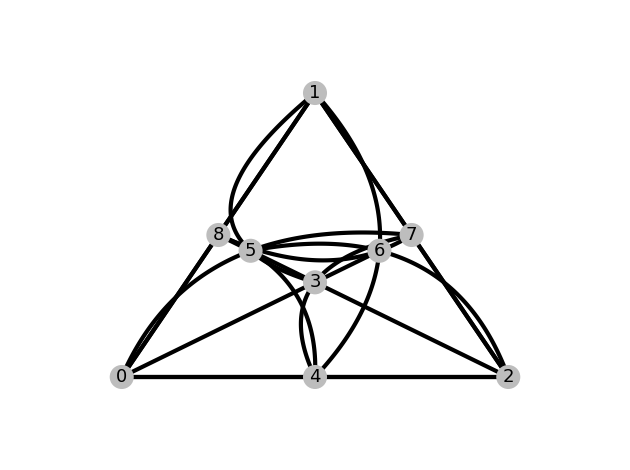

In [3]:
M = matroids.AG(2,3)
pos={0:(1,3), 1:(2,4), 2:(3,5), 3:(4,6), 4:(5,0), 5:(6,1), 6:(0,2)}
M.show(pos_method=1,pos_dict=pos)

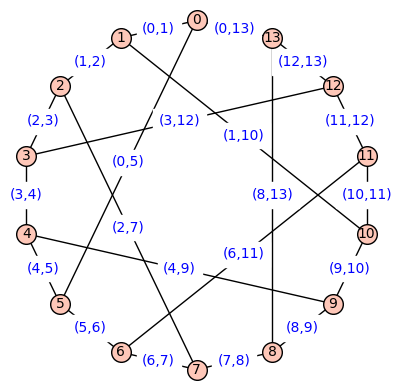

In [5]:
G = graphs.HeawoodGraph().copy(sparse=True)
for u,v,l in G.edges():
    G.set_edge_label(u,v,'(' + str(u) + ',' + str(v) + ')')
G.graphplot(edge_labels=True).show()

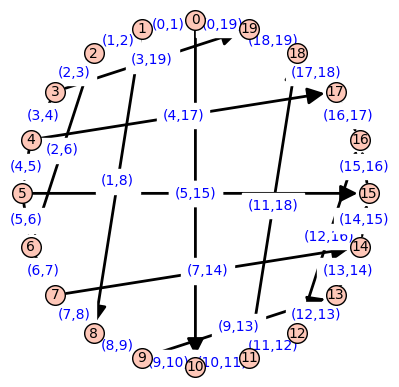

In [11]:
D = DiGraph( { 0: [1, 10, 19], 1: [8, 2], 2: [3, 6], 3: [19, 4],
              4: [17, 5], 5: [6, 15], 6: [7], 7: [8, 14], 8: [9],
              9: [10, 13],10: [11], 11: [12, 18], 12: [16, 13],13: [14],
              14: [15], 15: [16],16: [17], 17: [18], 18: [19], 19: []})
for u,v,l in D.edges():
    D.set_edge_label(u,v,'(' + str(u) + ',' + str(v) + ')')
D.graphplot(edge_labels=True, layout='circular').show()

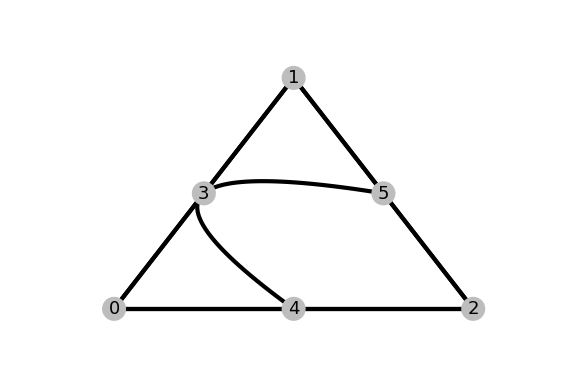

In [12]:
M = matroids.CompleteGraphic(4);M.show()

In [18]:
fano_blocks = [[0,1,2],[0,3,4],[0,5,6],[1,3,5],[1,4,6],[2,3,6],[2,4,5]]
fano_blocks

[[0, 1, 2], [0, 3, 4], [0, 5, 6], [1, 3, 5], [1, 4, 6], [2, 3, 6], [2, 4, 5]]

In [21]:
M = matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,-1,0,0],[-1,1,0,0],[-1,0,0,0],[0,-1,0,0],[1,-1,-1,0],[-1,1,0,-1]])
P = Polyhedron(M); P
L = LatticePolytope(M.rows()); L
print L.poly_x("")
print P.f_vector()

M:11 10 N:59 24 H:50,6 [88]

(1, 10, 34, 48, 24, 1)


In [22]:
P.show()

Graphics3d Object

In [24]:
for x in GF(7):
    L = [x+1,x+2,x+4]
    L.sort()
    print x, L

0 [1, 2, 4]
1 [2, 3, 5]
2 [3, 4, 6]
3 [0, 4, 5]
4 [1, 5, 6]
5 [0, 2, 6]
6 [0, 1, 3]


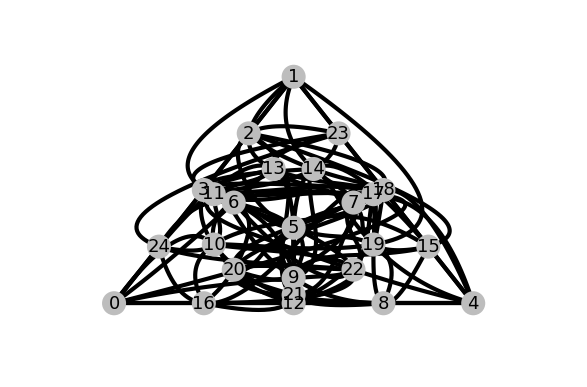

AttributeError: 'sage.matroids.linear_matroid.LinearMatroid' object has no attribute 'charpoly'

In [42]:
A = matroids.AG(2,5)
pos={0:(1,2,4), 1:(2,3,5), 2:(3,4,6), 3:(0,4,5), 4:(1,5,6), 5:(0,2,6), 6:(0,1,3)}
A.show(pos_method=1,pos_dict=pos)
A.charpoly()

In [41]:
#Graph(A,format="adjacency_matrix")